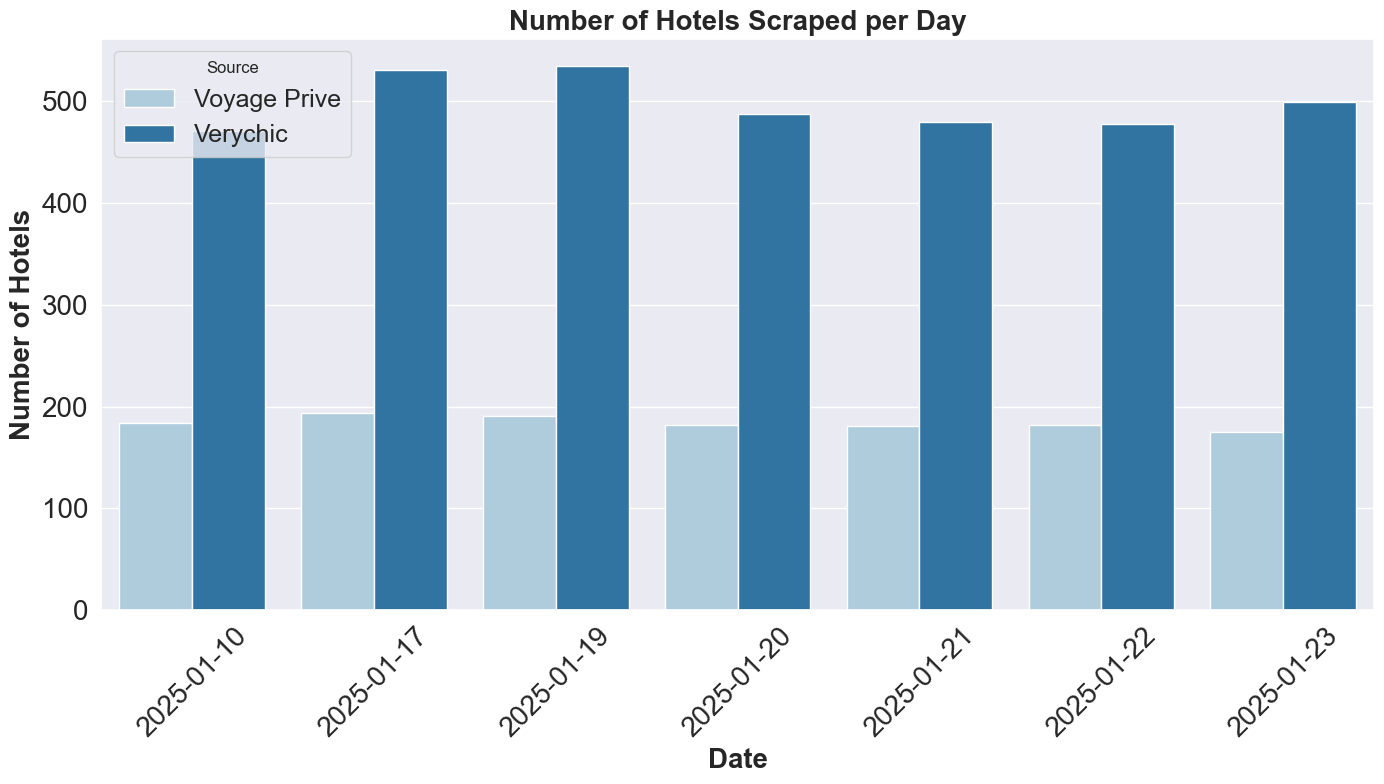

In [5]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Function to extract the date from filenames
def extract_date_from_filename(filename, prefix):
    date_str = filename.replace(prefix, "").replace(".csv", "").split("_")[-3:]
    date_str = "_".join(date_str)
    return datetime.strptime(date_str, "%d_%m_%Y").date()

# Combine Voyage Prive files and count rows per day
voyageprive_files = glob.glob("../../data/voyageprive_hotels_*.csv")
voyageprive_counts = {
    extract_date_from_filename(file, "../../data/voyageprive_hotels_"): len(pd.read_csv(file))
    for file in voyageprive_files
}

# Combine Verychic files and count rows per day
verychic_files = glob.glob("../../data/verychic_hotels_*.csv")
verychic_counts = {
    extract_date_from_filename(file, "../../data/verychic_hotels_"): len(pd.read_csv(file))
    for file in verychic_files
}

# Convert counts to DataFrame
data = pd.DataFrame({
    "Date": list(voyageprive_counts.keys()),
    "Voyage Prive": list(voyageprive_counts.values()),
    "Verychic": [verychic_counts.get(date, 0) for date in voyageprive_counts.keys()]
}).sort_values("Date")

# Melt data for Seaborn
data_melted = data.melt(id_vars=["Date"], var_name="Source", value_name="Count")

# Set Seaborn theme
sns.set_theme(style="darkgrid")

# Plot grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    x="Date",
    y="Count",
    hue="Source",
    data=data_melted,
    palette="Paired"
)

# Enhance plot
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)

plt.title("Number of Hotels Scraped per Day", fontsize=20, fontweight='bold')
plt.xlabel("Date", fontsize=20, fontweight='bold')
plt.ylabel("Number of Hotels", fontsize=20, fontweight='bold')
plt.legend(title="Source", fontsize=18)
plt.tight_layout()

plt.savefig("../../plots/records_per_day.png")
plt.show()
